# Multi-Lable Classification with MLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import os, sys
# sys.path.append(os.pardir)

from anime_classification import MultiLabelClassifier, Adam, Trainer

## Load Vectorized Synopsis/Genre Data

In [2]:
synop_vec = pd.read_csv('../synopsis_vector/synopsis_vector.csv')
synop_vec.head()

,MAL_ID,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,0.068298,-0.725098,0.113098,0.290283,0.453369,0.393066,-0.391357,-0.298828,-0.325928,...,0.264160,-0.158203,-0.241699,-0.162842,0.262939,0.133911,0.023285,0.187500,0.445068,0.385498
1,5,0.421631,-0.444580,0.062561,0.541016,0.240845,0.596191,-0.235229,-0.553223,-0.411377,...,0.140869,-0.198486,-0.248657,-0.059326,0.421631,0.312012,0.078186,0.145752,0.477539,0.286621
2,6,-0.009071,-0.538086,0.002262,0.397949,0.303467,0.380127,-0.252930,-0.568359,-0.080444,...,-0.218140,-0.153564,-0.535645,-0.525879,0.425293,0.391357,0.175781,0.288330,0.453613,0.252197
3,7,0.189819,-0.184326,0.163452,0.218872,0.219849,0.500977,-0.290527,-0.662109,-0.368164,...,-0.125244,-0.370850,-0.436523,-0.446289,0.511719,0.118896,-0.155273,0.532715,0.250244,0.290283
4,8,0.280273,-0.597168,0.108032,0.311523,0.265381,0.325928,0.149902,-0.320557,-0.182861,...,0.358154,-0.302734,-0.400146,-0.795410,0.366455,0.244995,0.036255,0.251465,0.431885,0.546875


In [3]:
genre_vec = pd.read_csv('../clean_data/genre.csv')
genre_vec.head()

,MAL_ID,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,6,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Split Train-Test Set

In [4]:
synop_cols = synop_vec.columns.drop('MAL_ID').values
genre_cols = genre_vec.columns.drop('MAL_ID').values

In [5]:
full_vec = pd.merge(synop_vec, genre_vec)
full_vec.head()

,MAL_ID,0,1,2,3,4,5,6,7,8,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,0.068298,-0.725098,0.113098,0.290283,0.453369,0.393066,-0.391357,-0.298828,-0.325928,...,0,0,1,0,0,0,0,0,0,0
1,5,0.421631,-0.444580,0.062561,0.541016,0.240845,0.596191,-0.235229,-0.553223,-0.411377,...,0,0,1,0,0,0,0,0,0,0
2,6,-0.009071,-0.538086,0.002262,0.397949,0.303467,0.380127,-0.252930,-0.568359,-0.080444,...,0,0,0,0,0,0,0,0,0,0
3,7,0.189819,-0.184326,0.163452,0.218872,0.219849,0.500977,-0.290527,-0.662109,-0.368164,...,0,0,0,0,0,1,0,0,0,0
4,8,0.280273,-0.597168,0.108032,0.311523,0.265381,0.325928,0.149902,-0.320557,-0.182861,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# random shuffle and re-index
full_vec = full_vec.sample(frac=1).reset_index(drop=True)
full_vec.head()

,MAL_ID,0,1,2,3,4,5,6,7,8,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32105,0.213989,-0.479248,0.187134,0.332031,0.355225,0.441162,-0.433594,-0.560547,-0.447998,...,0,0,0,0,0,1,0,0,0,0
1,291,0.479248,-0.445068,0.439209,0.401123,0.498779,0.437012,-0.219116,-0.177002,-0.348145,...,0,0,0,0,0,1,0,0,0,0
2,1975,0.547363,-0.491699,0.475342,0.098328,0.464355,0.755371,-0.666016,-0.433350,-0.198608,...,0,0,0,0,0,0,0,0,0,0
3,1252,0.611816,-0.109802,0.437988,-0.082947,-0.132080,0.223389,-0.506348,-0.321777,-0.589355,...,0,0,0,0,0,0,0,0,0,0
4,242,0.215210,-0.345947,0.088379,0.329590,0.323975,0.209961,0.031616,-0.132202,-0.168457,...,0,1,0,0,0,0,0,0,0,0


In [7]:
# split dataframe to train-test numpy array
train_ratio = 0.95
num_train = int(len(full_vec) * train_ratio)

x_train = full_vec[synop_cols][:num_train].values
t_train = full_vec[genre_cols][:num_train].values
id_train = full_vec['MAL_ID'][num_train:].values

x_test = full_vec[synop_cols][num_train:].values
t_test = full_vec[genre_cols][num_train:].values
id_test = full_vec['MAL_ID'][num_train:].values

del synop_vec, genre_vec, full_vec

In [8]:
# standardization
# x_train_mean = x_train.mean(axis=0)
# x_train_std  = x_train.std(axis=0)

# x_train = (x_train - x_train_mean) / x_train_std
# x_test  = (x_test  - x_train_mean) / x_train_std

## Define Model

In [9]:
input_size  = len(synop_cols)
output_size = len(genre_cols)

model = MultiLabelClassifier(input_size=input_size,
                             hidden_size_list=[100, 100, 100, 100],
                             output_size=output_size,
                            #  use_dropout=True,
                            #  dropout_ratio=0.8,
                            #  use_batchnorm=True,
                             use_focal_loss=True,
                             focal_gamma=2)
model.summary()

------------------------------------------------------------
Affine(input_size=100, output_size=100, weight_init=xavier)
------------------------------------------------------------
Sigmoid
------------------------------------------------------------
Affine(input_size=100, output_size=100, weight_init=xavier)
------------------------------------------------------------
Sigmoid
------------------------------------------------------------
Affine(input_size=100, output_size=100, weight_init=xavier)
------------------------------------------------------------
Sigmoid
------------------------------------------------------------
Affine(input_size=100, output_size=100, weight_init=xavier)
------------------------------------------------------------
Sigmoid
------------------------------------------------------------
Affine(input_size=100, output_size=43, weight_init=xavier)
------------------------------------------------------------
FocalLoss(gamma=2)
----------------------------------------

In [10]:
optimizer = Adam()
trainer = Trainer(model, optimizer)

## Train Model

In [11]:
num_epochs = 100
batch_size = 100

trainer.fit(x_train, t_train, x_test, t_test, 
            max_epoch=num_epochs, 
            batch_size=batch_size)

| epoch   1 | time   0[s] | train loss 2.77 | val loss 2.82
| epoch   2 | time   1[s] | train loss 2.77 | val loss 2.82
| epoch   3 | time   1[s] | train loss 2.77 | val loss 2.82
| epoch   4 | time   1[s] | train loss 2.77 | val loss 2.81
| epoch   5 | time   2[s] | train loss 2.77 | val loss 2.82
| epoch   6 | time   2[s] | train loss 2.77 | val loss 2.81
| epoch   7 | time   2[s] | train loss 2.77 | val loss 2.82
| epoch   8 | time   2[s] | train loss 2.77 | val loss 2.82
| epoch   9 | time   3[s] | train loss 2.77 | val loss 2.81
| epoch  10 | time   3[s] | train loss 2.74 | val loss 2.78
| epoch  11 | time   3[s] | train loss 2.70 | val loss 2.73
| epoch  12 | time   3[s] | train loss 2.68 | val loss 2.72
| epoch  13 | time   3[s] | train loss 2.67 | val loss 2.70
| epoch  14 | time   4[s] | train loss 2.66 | val loss 2.70
| epoch  15 | time   4[s] | train loss 2.66 | val loss 2.69
| epoch  16 | time   4[s] | train loss 2.66 | val loss 2.70
| epoch  17 | time   4[s] | train loss 2

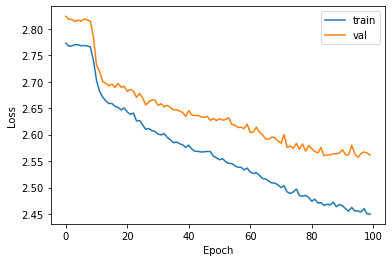

In [12]:
trainer.plot()

In [29]:
synop = pd.read_csv('../clean_data/synopsis.csv')

num_show = 10
i_start = 6

y_test = model.predict(x_test)

print('{:^7} {:^7} {:^7} {:^7} {:^7}'.format('True', 'Pred', 'Correct', 'Wrong', 'Missed'))

for idx in range(i_start, num_show+i_start):
    mal_id = id_test[idx]
    
    pred = y_test[idx]>=0.5
    true = t_test[idx]==1

    n_true = true.sum()
    n_pred = pred.sum()
    n_correct = (true & pred).sum()
    n_wrong   = (~true & pred).sum()
    n_missed  = (true & ~pred).sum()

    print('{:^7} {:^7} {:^7} {:^7} {:^7}\n'.format(n_true, n_pred, n_correct, n_wrong, n_missed))

 True    Pred   Correct  Wrong  Missed 
   3       1       1       0       2   

   4       0       0       0       4   

   2       0       0       0       2   

   3       1       0       1       3   

   3       2       1       1       2   

   1       0       0       0       1   

   3       0       0       0       3   

   2       0       0       0       2   

   7       0       0       0       7   

   3       1       0       1       3   

